# Nama : Febrian Dani Ritonga
# Kelas : 3H
# NIM : 2141720070
# WEEK 12,

## TUGAS PRAKTIKUM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

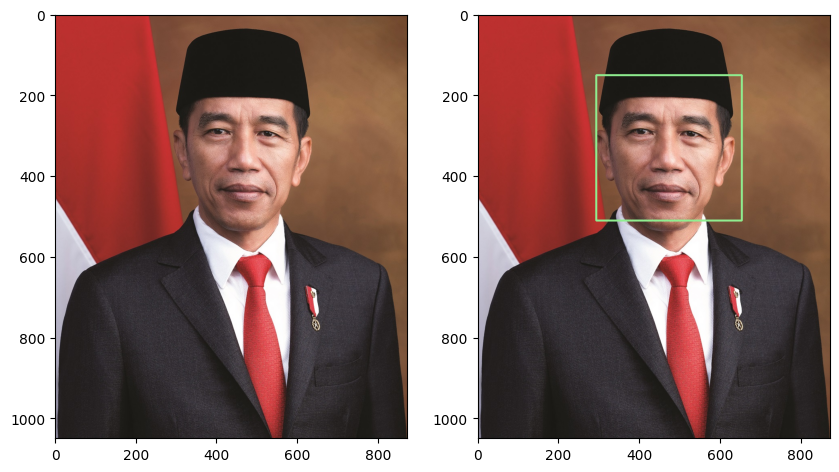

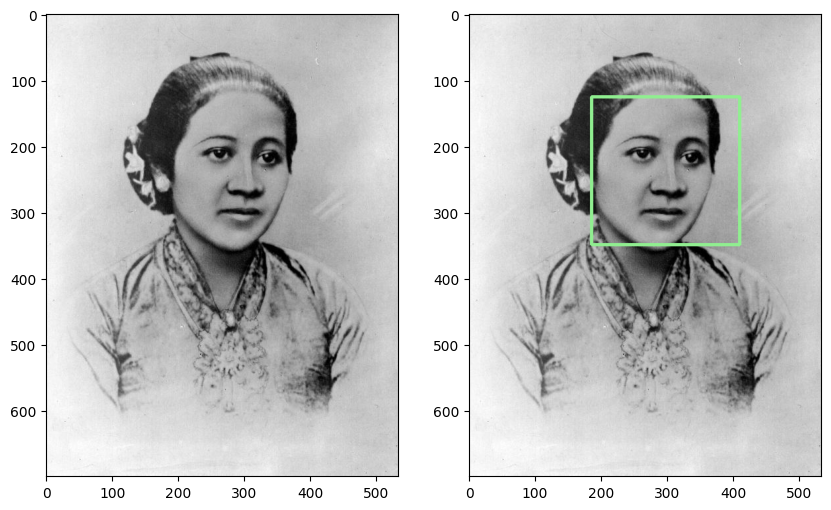

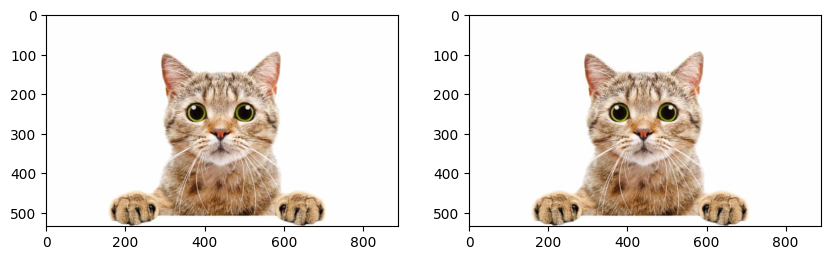

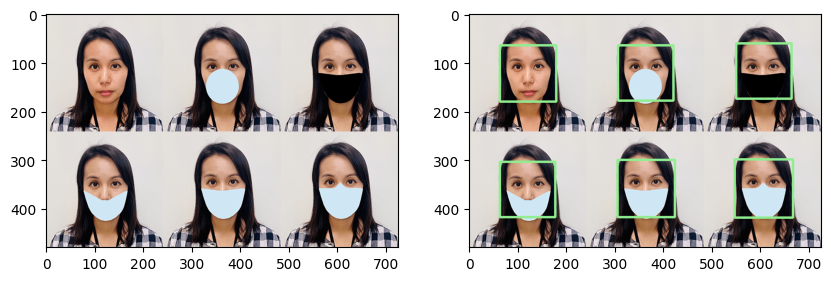

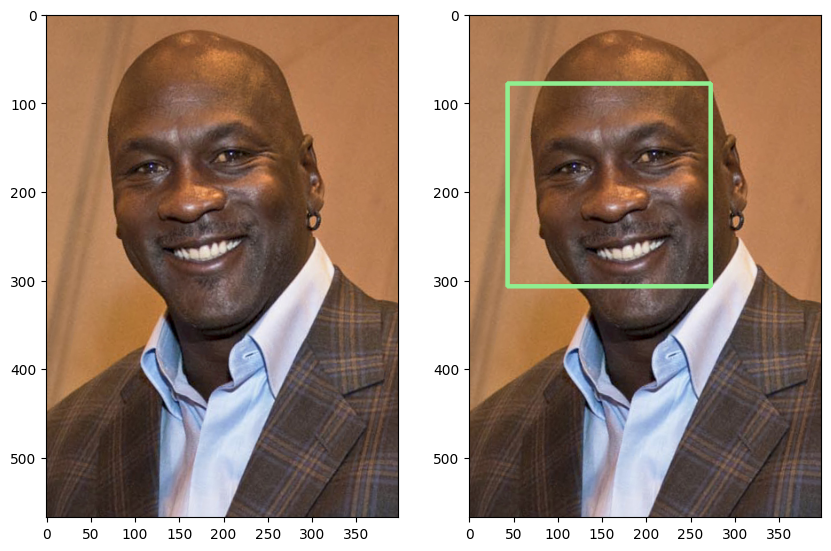

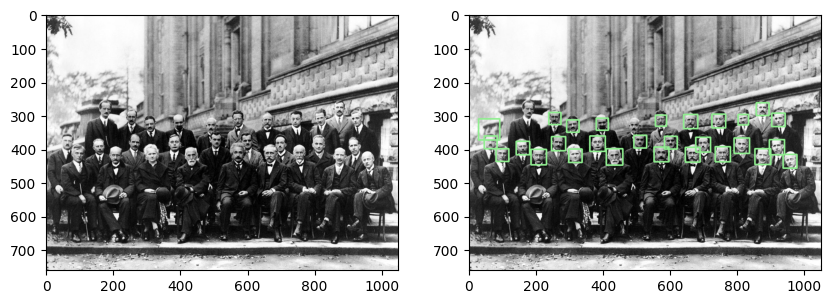

In [ ]:
def detect_face(img, cascade):
  cascade_wajah = cv.CascadeClassifier(cascade)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_1,(x,y),(x+w,y+h),(144, 238, 144), 4)

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/week12/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/PCVK/week12/haarcascades/haarcascade_frontalface_alt.xml'
  detect_face(img, cascade)

### 3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

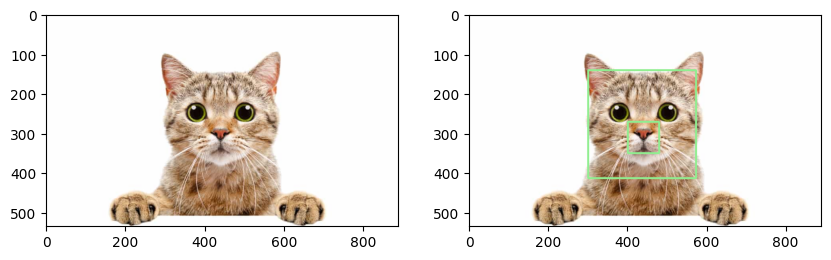

In [ ]:
cat_image = cv.imread('/content/drive/MyDrive/PCVK/week12/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/PCVK/week12/haarcascades/haarcascade_frontalcatface_extended.xml'
detect_face(cat_image, cascade)

### 4. Cobakan juga untuk eyes detection.


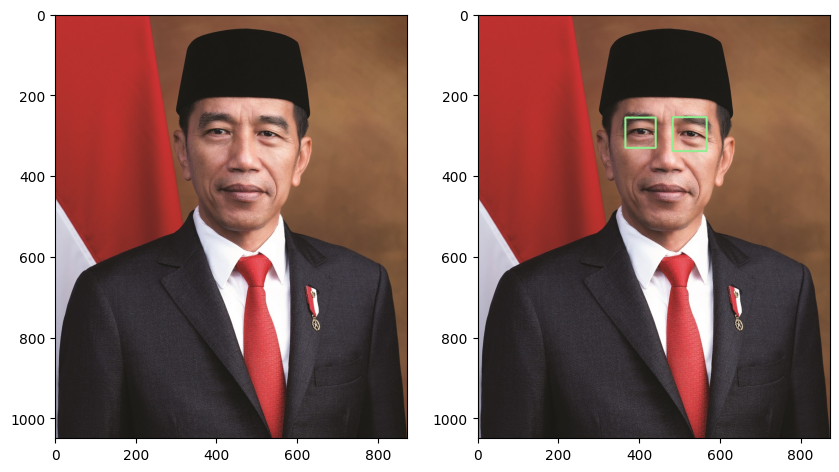

In [ ]:
jokowi_image = cv.imread('/content/drive/MyDrive/PCVK/week12/facedet/jokowi.jpg')
cascade = '/content/drive/MyDrive/PCVK/week12/haarcascades/haarcascade_eye.xml'
detect_face(jokowi_image, cascade)

### 5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

In [ ]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


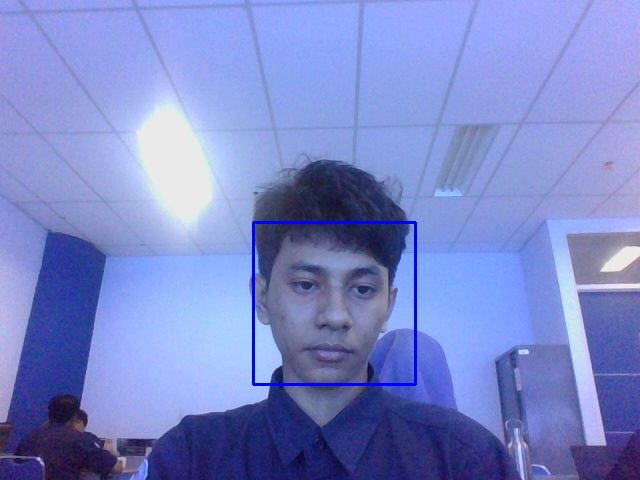

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### 6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

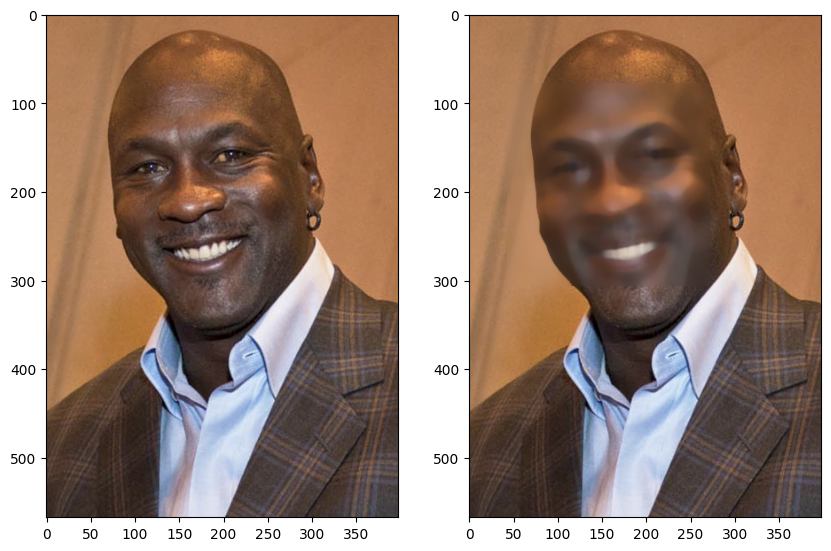

In [ ]:
def blur_face(img):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/week12/haarcascades/haarcascade_frontalface_alt.xml')
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    roi = img_1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, 15)
    img_1[y:y+h, x:x+w] = blur

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/week12/facedet/'
list_face = ['mjordan.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  blur_face(img)

### 7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

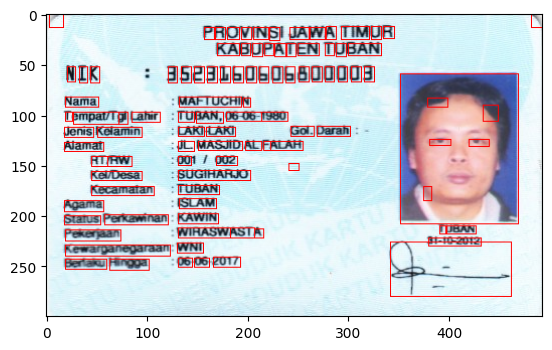

In [34]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Week8/KTP_More/ktp4.png')

gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

# Metode adaptif thresholding untuk menangani variasi pencahayaan
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 15)

kernel = np.ones((2, 2), np.uint8)
morphology = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

contours, _ = cv.findContours(morphology, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w > 5 and h > 5:  # Menyesuaikan batas ukuran karakter yang terdeteksi
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), 1)

result = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

plt.imshow(result)
plt.show()

### 8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

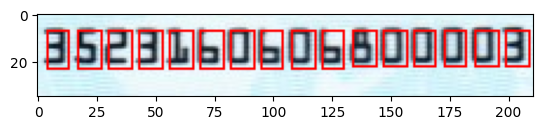

In [48]:
start_x = 117
start_y = 45
end_x = 328
end_y = 80

nik = result[start_y:end_y, start_x:end_x]
plt.imshow(nik)

### 9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [55]:
from tqdm import tqdm
import random
import pickle
import os  # Modul os ditambahkan
import cv2 as cv  # Menggunakan cv2 sebagai cv

# Direktori data training
DATADIR = "/content/drive/MyDrive/PCVK/week12/trainingSample/"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    if not os.path.isdir(path):  # Memeriksa apakah path adalah sebuah direktori
        continue  # Jika bukan direktori, lanjut ke iterasi berikutnya
    class_number = dirs.index(char_name)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_ANYCOLOR)
            new_array = cv.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

import numpy as np  # Modul numpy ditambahkan untuk menggunakan np.array

X = np.array(X).reshape(-1, width, height, 3)

# Tulis ke file pickle
with open("X.pickle", "wb") as pickle_out:  # Menggunakan 'with' statement untuk membuka file pickle
    pickle.dump(X, pickle_out)

with open("Y.pickle", "wb") as pickle_out:  # Menggunakan 'with' statement untuk membuka file pickle
    pickle.dump(Y, pickle_out)


### 10. Lakukan Training Data

In [58]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 3))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

ValueError: ignored

### 11. Testing Data

## TUGAS
### Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!